# IMPORTING LIBRARIES AND DATASET


In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [3]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

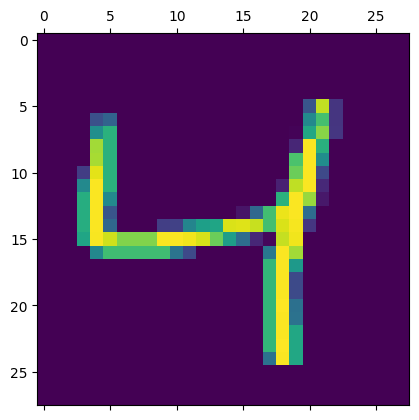

In [4]:

plt.matshow(X_train[2])


In [5]:
Y_train[2]

4

In [6]:
X_test.shape

(10000, 28, 28)

# NORMALISATION OF THE ARRAY FOR BETTER RESULTS


In [7]:
X_train=X_train/255
X_test = X_test/255

# TRAINING MODEL (NEURAL NETWORKS)

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)
model.save('handwritten_digit_model.keras')
    


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8756 - loss: 0.4481
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9618 - loss: 0.1327
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9725 - loss: 0.0920
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9806 - loss: 0.0660
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9851 - loss: 0.0497
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9883 - loss: 0.0398
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9908 - loss: 0.0324
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9916 - loss: 0.0263
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9929 - loss: 0.0235
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9943 - loss: 0.0188


# MODEL PREDICTION

In [41]:
y_predicted = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


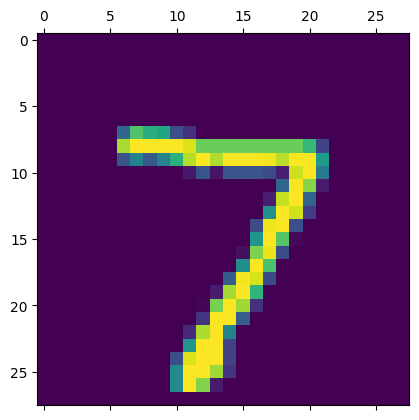

In [42]:
plt.matshow(X_test[0])

In [43]:
np.argmax(y_predicted[0])

7

In [44]:
accuracy,loss=model.evaluate(X_test,Y_test)
print(f"Accuracy = {accuracy} and Loss= {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9717 - loss: 0.0951
Accuracy = 0.08385854214429855 and Loss= 0.9753999710083008


In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [46]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    4,    1,    0,    2,    2,    1,    3,    1],
       [   0, 1123,    2,    1,    1,    2,    2,    1,    3,    0],
       [   3,    3,  992,    5,    3,    0,    1,   12,   12,    1],
       [   0,    0,    4,  964,    1,   19,    0,    9,    4,    9],
       [   0,    0,    5,    1,  963,    0,    2,    5,    0,    6],
       [   1,    0,    0,    2,    1,  876,    4,    1,    6,    1],
       [   2,    4,    0,    1,    6,    9,  932,    0,    4,    0],
       [   0,    3,    7,    0,    0,    0,    0, 1010,    2,    6],
       [   1,    0,    1,    5,    2,    4,    1,    5,  950,    5],
       [   0,    2,    0,    3,   10,    6,    0,    7,    3,  978]])>

Text(95.72222222222221, 0.5, 'Truth')

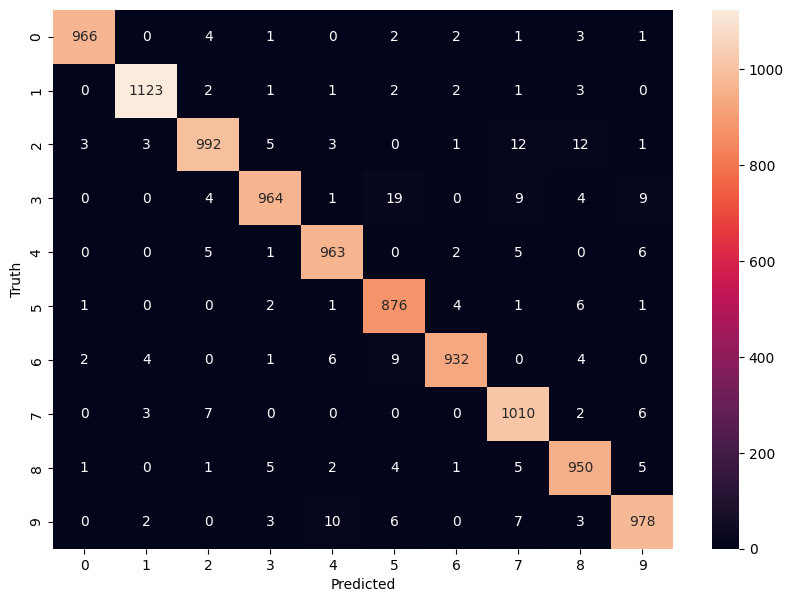

In [47]:

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')